In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Загрузка данных из файлов CSV с указанием параметра low_memory=False
train_data = pd.read_csv('data/fashion-mnist_train.csv', low_memory=False)
test_data = pd.read_csv('data/fashion-mnist_test.csv', low_memory=False)

# Выводим информацию о датасете
print("Размерность данных TEST: ", test_data.shape)
print("Метки классов TEST: ", test_data['label'].unique())
# Проверка размерности данных
print("Размерность данных TRAIN без Lable: ", train_data.drop(columns=['label']).shape)

Размерность данных TEST:  (10000, 785)
Метки классов TEST:  [0 1 2 3 8 6 5 4 7 9]
Размерность данных TRAIN без Lable:  (60000, 784)


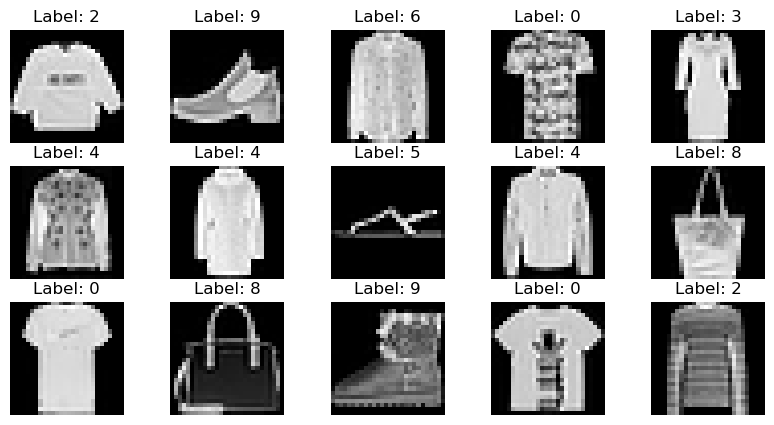

In [10]:
# Преобразование данных в массив NumPy и затем в форму изображений
train_data_images = train_data.drop(columns=['label']).values

# Проверка, что количество элементов кратно 784
if train_data_images.size % 784 == 0:
    train_data_images = train_data_images.reshape(-1, 28, 28)
else:
    print("Ошибка: количество элементов в данных не кратно 784")

# Выводим несколько изображений из датасета
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(train_data_images[i], cmap='gray')
    ax.set_title(f'Label: {train_data["label"].iloc[i]}')
    ax.axis('off')
plt.show()

In [3]:
# Разделение данных на признаки и метки
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
X_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


*****************
Метрики качества:
*****************
MAE: 0.8165
MSE: 1.5829
RMSE: 1.2581
R²: 0.8081


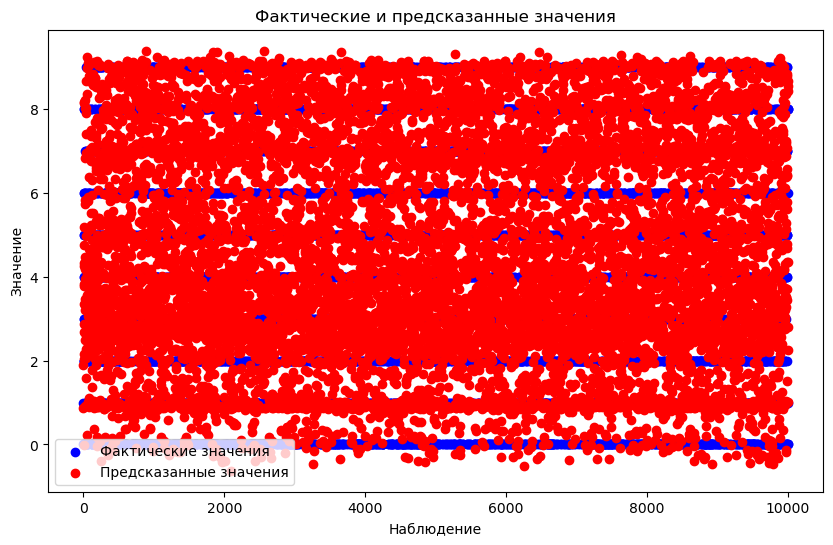

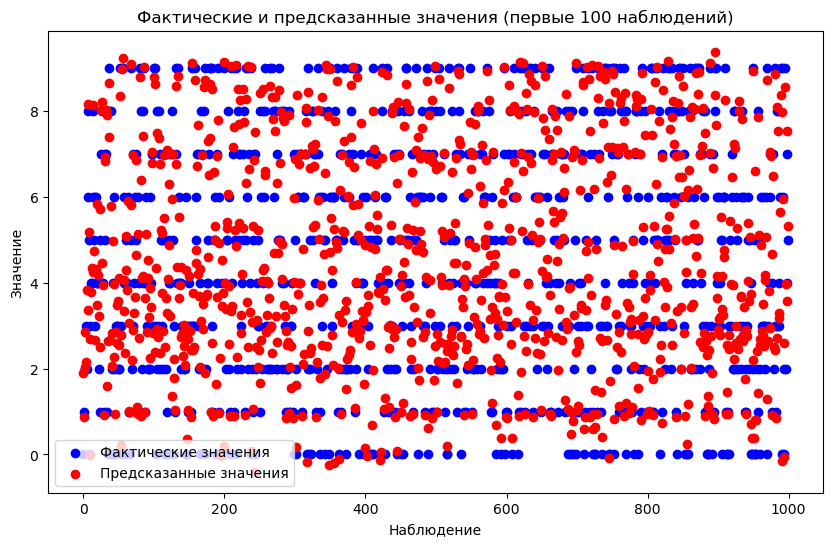

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Создание и обучение модели Gradient Boosting Regressor
model = GradientBoostingRegressor() # параметры
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Визуализация первых 1000 результатов
plt.figure(figsize=(10, 6))
plt.scatter(range(1000), y_test[:1000], color='blue', label='Фактические значения')
plt.scatter(range(1000), y_pred[:1000], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (первые 100 наблюдений)')
plt.legend()
plt.show()

MAE: 0.6692
MSE: 1.2031
RMSE: 1.0969
R²: 0.8542


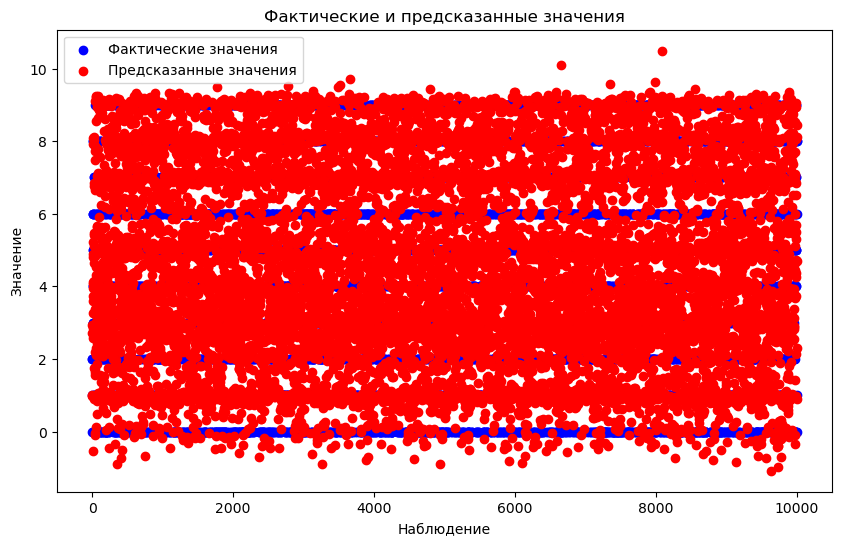

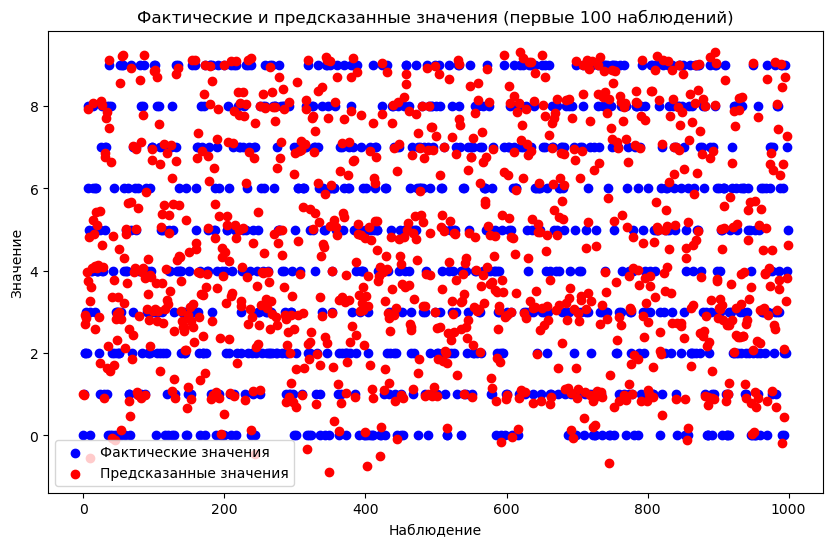

In [5]:
from catboost import CatBoostRegressor

# Создание и обучение модели CatBoost для регрессии
regressor = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, random_state=42, verbose=0)
regressor.fit(X_train, y_train)

# Выполнение предсказаний на тестовых данных
y_pred = regressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Визуализация первых 1000 результатов
plt.figure(figsize=(10, 6))
plt.scatter(range(1000), y_test[:1000], color='blue', label='Фактические значения')
plt.scatter(range(1000), y_pred[:1000], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (первые 100 наблюдений)')
plt.legend()
plt.show()


MAE: 1.5052
MSE: 3.2265
RMSE: 1.7962
R²: 0.6089


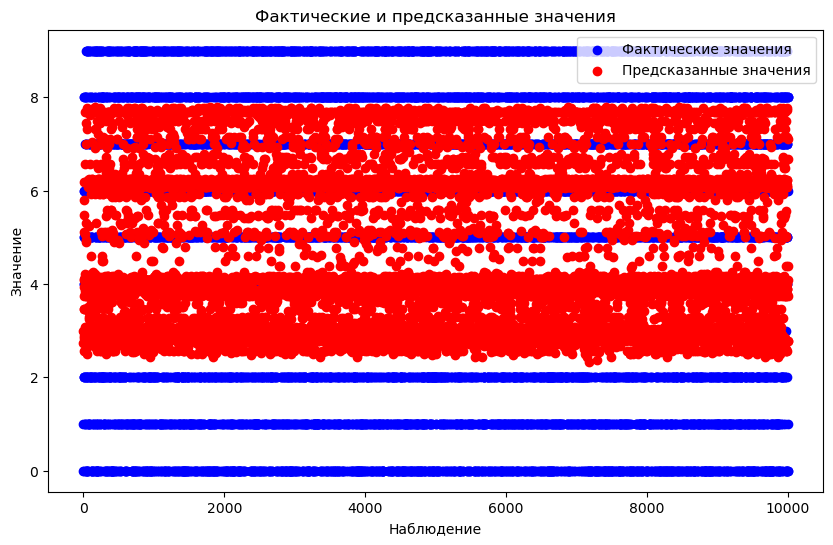

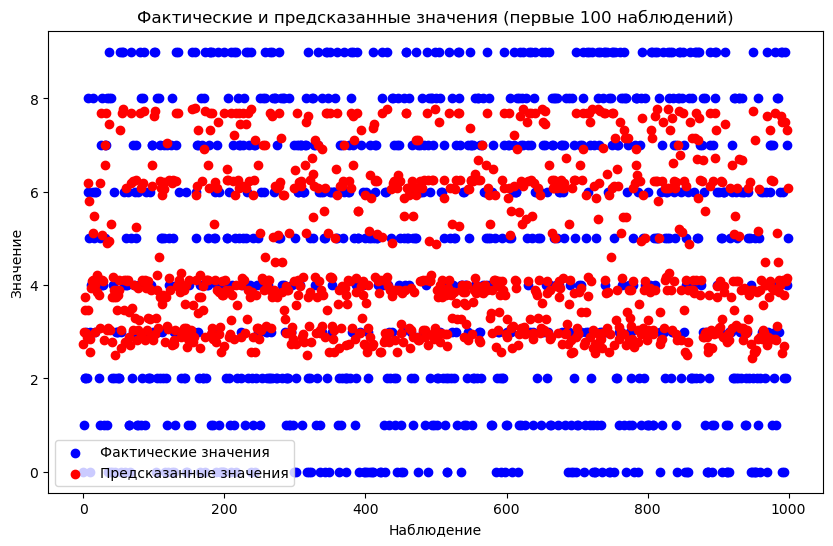

In [6]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Создание и обучение модели AdaBoostRegressor
regressor = AdaBoostRegressor(n_estimators=500, random_state=42)
regressor.fit(X_train, y_train)

# Выполнение предсказаний на тестовых данных
y_pred = regressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Визуализация первых 1000 результатов
plt.figure(figsize=(10, 6))
plt.scatter(range(1000), y_test[:1000], color='blue', label='Фактические значения')
plt.scatter(range(1000), y_pred[:1000], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (первые 100 наблюдений)')
plt.legend()
plt.show()

MAE: 1.1411
MSE: 2.2972
RMSE: 1.5156
R²: 0.7216


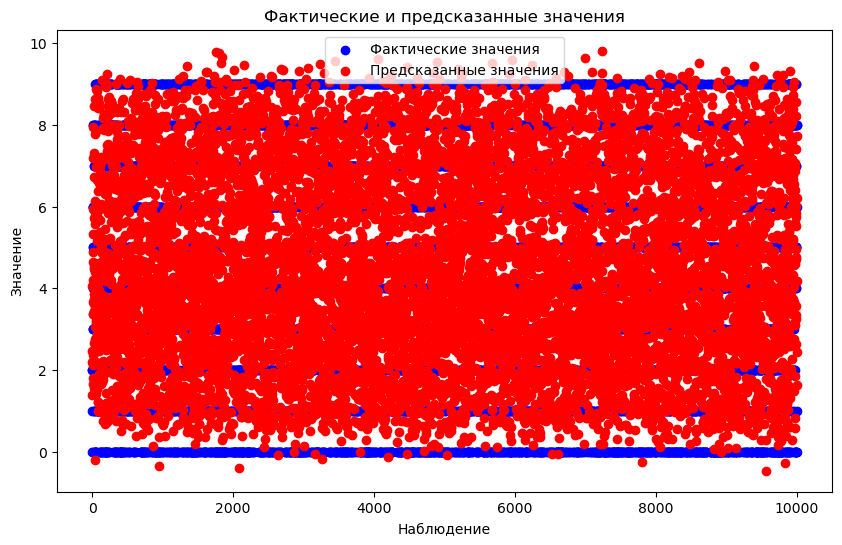

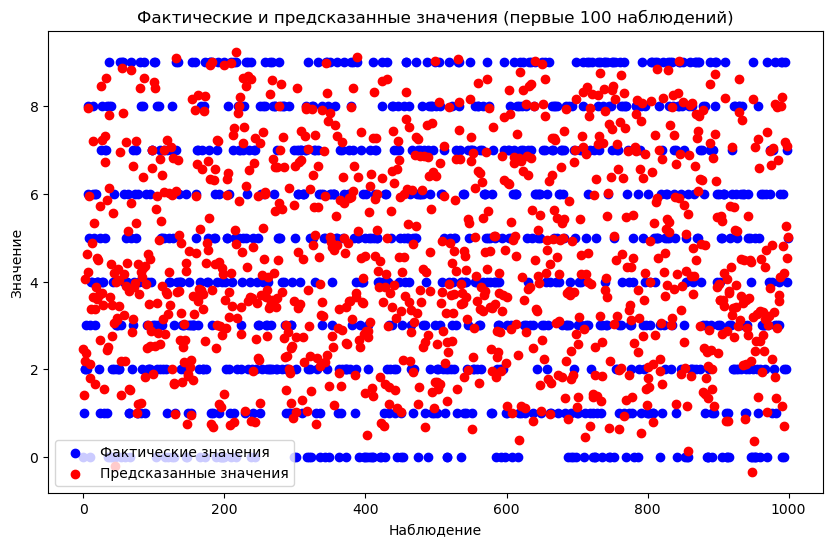

In [7]:
# Лассо
from sklearn.linear_model import Lasso

# Создание и обучение модели регрессии Lasso
regressor = Lasso(alpha=0.1)  # Здесь alpha - гиперпараметр регуляризации L1
regressor.fit(X_train, y_train)

# Выполнение предсказаний на тестовых данных
y_pred = regressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Визуализация первых 1000 результатов
plt.figure(figsize=(10, 6))
plt.scatter(range(1000), y_test[:1000], color='blue', label='Фактические значения')
plt.scatter(range(1000), y_pred[:1000], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (первые 100 наблюдений)')
plt.legend()
plt.show()

*****************
Метрики качества модели Extra Trees Regressor:
*****************
MAE: 0.5556
MSE: 1.1071
RMSE: 1.0522
R²: 0.8658


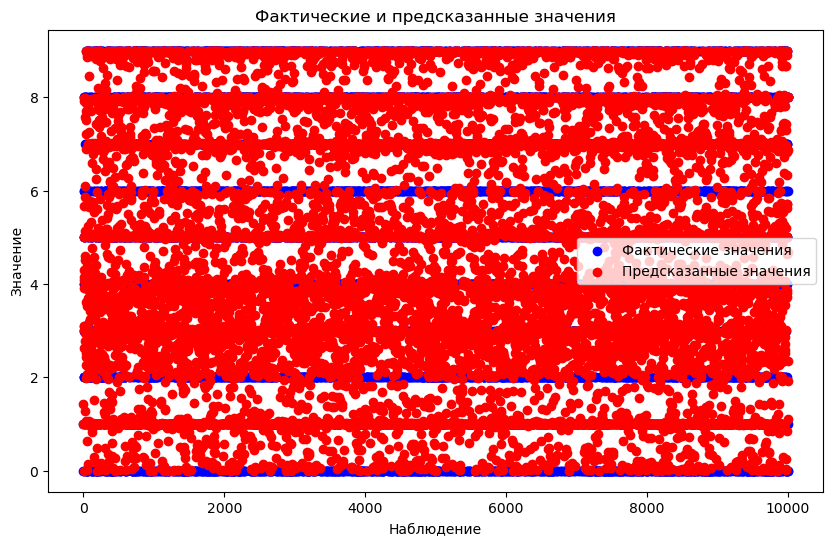

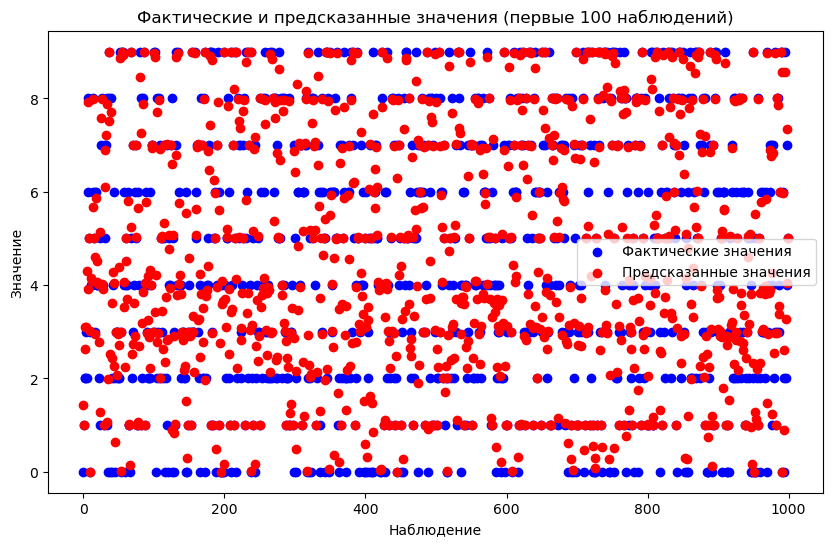

In [9]:
# ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

#  Создание и обучение модели Extra Trees Regressor
etr = ExtraTreesRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
etr.fit(X_train, y_train)

#  Предсказание на тестовой выборке
y_pred = etr.predict(X_test)

#  Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества модели Extra Trees Regressor:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Визуализация первых 1000 результатов
plt.figure(figsize=(10, 6))
plt.scatter(range(1000), y_test[:1000], color='blue', label='Фактические значения')
plt.scatter(range(1000), y_pred[:1000], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (первые 100 наблюдений)')
plt.legend()
plt.show()